In [3]:
import os, shutil
import subprocess as subp
import numpy as np
import mdtraj
import matplotlib.pyplot as plt
import scipy.signal

In [4]:
# Function that load the real data
def load_real_data(epoch, f=None):
    fval = []
    for i in range(1,N+1):
        d = "epoch%02d/rep%02d/"%(epoch, i)
        fval.append(np.load(d+"fval.npy"))
        print("Loaded fval from %sfval.npy"%d)
    
    reps = [np.full(f.shape,i+1) for i,f in enumerate(fval)]
    frms = [np.arange(len(f)) for f in fval]
    
    return np.concatenate(reps), (np.concatenate(fval)-0.799)*100/(1.4-0.799), np.concatenate(frms)


def rand_func(f,n=600,i=1):
    x = np.linspace(-10,100, 10000)
    pdf = f(x,i)
    pdf /= np.sum(pdf)
    cdf = np.cumsum(pdf)
    u = np.random.random(n)
    return np.array([x[np.argmax(uu<=cdf)] for uu in u])
    

# Function for "loading" random data
def load_data(epoch, f=np.sin):
    fval = []
    for i in range(1,N+1):
        d = "epoch%02d/rep%02d/"%(epoch, i)
        fval.append(rand_func(f,i=epoch))
        print("Faked fval for %sfval.npy"%d)
    
    reps = [np.full(f.shape,i+1) for i,f in enumerate(fval)]
    frms = [np.arange(len(f)) for f in fval]
    
    return np.concatenate(reps), np.concatenate(fval), np.concatenate(frms)


In [11]:
# Choose wich data to load
#load_data = load_real_data
# Arbitrary propability distribution
def func(x,i):
    return np.exp(-0.5*((x-15*(i-1))/(10/i))**2)

def func2(x,i):
    return np.exp(-0.5*((x-10*(i**2-1))/(10))**2)

epochs = 3
N=16
maxval=100
minval=0
fval = []
reps = []
frms = []
for i in range(1,epochs+1):
    r,f,fr = load_data(i,func2)
    reps.append(r)
    fval.append(f)
    frms.append(fr)

    
epcs = [np.full(f.shape,i+1) for i,f in enumerate(fval)]

reps = np.concatenate(reps)
fval = np.concatenate(fval)
epcs = np.concatenate(epcs)
frms = np.concatenate(frms)

Faked fval for epoch01/rep01/fval.npy
Faked fval for epoch01/rep02/fval.npy
Faked fval for epoch01/rep03/fval.npy
Faked fval for epoch01/rep04/fval.npy
Faked fval for epoch01/rep05/fval.npy
Faked fval for epoch01/rep06/fval.npy
Faked fval for epoch01/rep07/fval.npy
Faked fval for epoch01/rep08/fval.npy
Faked fval for epoch01/rep09/fval.npy
Faked fval for epoch01/rep10/fval.npy
Faked fval for epoch01/rep11/fval.npy
Faked fval for epoch01/rep12/fval.npy
Faked fval for epoch01/rep13/fval.npy
Faked fval for epoch01/rep14/fval.npy
Faked fval for epoch01/rep15/fval.npy
Faked fval for epoch01/rep16/fval.npy
Faked fval for epoch02/rep01/fval.npy
Faked fval for epoch02/rep02/fval.npy
Faked fval for epoch02/rep03/fval.npy
Faked fval for epoch02/rep04/fval.npy
Faked fval for epoch02/rep05/fval.npy
Faked fval for epoch02/rep06/fval.npy
Faked fval for epoch02/rep07/fval.npy
Faked fval for epoch02/rep08/fval.npy
Faked fval for epoch02/rep09/fval.npy
Faked fval for epoch02/rep10/fval.npy
Faked fval f

28800
99.98899889988999 0 24839 124 0.8870080556442741


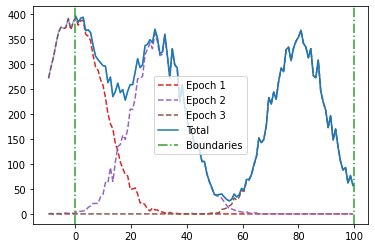

In [12]:
print(len(fval))
_largest_val = np.max(fval)
_lowest_val  = np.min(fval)
_binmax = min(_largest_val, maxval)
_binmin = max(_lowest_val,  minval)
_maxbins = np.sum((fval>minval)*(fval<maxval))//200
_binsize = (_largest_val-_lowest_val)/min(_maxbins,200)
print(_binmax,_binmin, np.sum((fval>minval)*(fval<maxval)),_maxbins,_binsize)
bin_edges = np.arange(_lowest_val,_largest_val+_binsize , _binsize)
hist, bin_edges = np.histogram(fval, bins=bin_edges)
bin_centers = (bin_edges[:-1]+bin_edges[1:])/2
# higher edge larger than minval AND lower edge lower than maxval
mask = (bin_edges[1:]>minval)*(bin_edges[:-1]<maxval)

for i in range(1,epochs+1):
    _ep_hist, _ = np.histogram(fval[epcs==i], bins=bin_edges)
    plt.plot(bin_centers, _ep_hist, "--", color="C%d"%(i+2), label="Epoch %d"%i)


plt.plot(bin_centers, hist, color="C0", alpha=0.5)
plt.plot(bin_centers[mask], hist[mask], color="C0", label="Total")
plt.axvline(minval, linestyle="-.", color="C2", label="Boundaries")
plt.axvline(maxval, linestyle="-.", color="C2")
plt.legend()
plt.show()


[19 61] {'prominences': array([ 96.77777778, 304.11111111]), 'left_bases': array([0, 0]), 'right_bases': array([32, 89]), 'widths': array([14.56352397, 31.47481437]), 'width_heights': array([-295.72222222, -186.38888889]), 'left_ips': array([10.76171875, 45.62121212]), 'right_ips': array([25.32524272, 77.09602649])}
[32 89] {'prominences': array([ 96.77777778, 234.66666667]), 'left_bases': array([19, 62]), 'right_bases': array([ 61, 108]), 'widths': array([13.8645721 , 21.34460971]), 'width_heights': array([295.72222222, 221.11111111]), 'left_ips': array([25.32524272, 79.25352113]), 'right_ips': array([ 39.18981481, 100.59813084])}
[72, 123] [7.63225806 6.36774194]
[72, 123] [7.63225806 6.36774194]
16 (array([ 72, 123]), array([9, 7]))


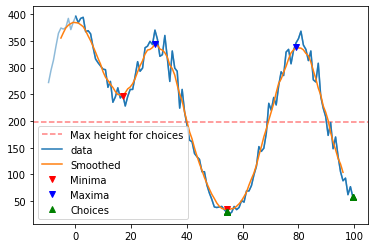

In [13]:
from math import floor, ceil

def rolling_mean(data, window=10, center = True, fill=np.nan):
    if(center):
        start_offset = floor(window/2)
        end_offset   = -ceil(window/2)+1
        if(end_offset==0): end_offset=None
    else:
        start_offset = window-1
        end_offset   = None

    window-=1
    if(window==0): window=None

    cumsum = np.nancumsum(data, axis=0, dtype=float)
    mean   = np.full_like(cumsum, fill)
    mean[start_offset:end_offset] = (cumsum[window:]-cumsum[:-window])/window

    return mean

_smoothed = rolling_mean(-hist)
_nanmask = np.isfinite(_smoothed)*mask
_peaks,_que = scipy.signal.find_peaks(_smoothed[_nanmask], width=10, distance=10)
_peaks2,_que2 = scipy.signal.find_peaks(-_smoothed[_nanmask], width=10, distance=10)
print(_peaks, _que)
print(_peaks2, _que2)


_maxh = np.max(hist[mask])
_minh = np.min(hist[mask])
# If not ends have sampled been, make sure min height set to zero is
if(_largest_val<maxval or _lowest_val>minval):
    _minh=0

_crith = (_maxh-_minh)/2+_minh

choices = []
# convert from masked indices to unmasked
_indexes = np.arange(len(hist))[_nanmask]
for p in _peaks:
    if(hist[_nanmask][p]<_crith):
        choices.append(_indexes[p])

_zero_mask = mask*(hist!=0)
_indexes = np.arange(len(hist))[_zero_mask]

# TODO: refactor below
#Handle not peaks-edge case
if(_peaks.size==0):
    if(hist[mask][-1]<_crith):
        choices.append(_indexes[-1])
    if(hist[mask][0]<_crith):
        choices.append(_indexes[0])
else:
    # Check if first/last extrema is a maxima -> also include the far end(s)
    if(_peaks2.size>0 and _peaks[-1]<_peaks2[-1] and hist[mask][-1]<_crith):
        choices.append(_indexes[-1])
    if(_peaks2.size>0 and _peaks[0]>_peaks2[0] and hist[mask][0]<_crith):
        choices.append(_indexes[0])

_weights = [(_crith-hist[c]) for c in choices]
_weights /= np.sum(_weights)
print(choices,(_weights*(N-len(choices))))
_srt_ind = np.argsort(-_weights)
print([choices[i] for i in _srt_ind],(_weights[_srt_ind]*(N-len(choices))))

# Each point has been added once
_len_choice = len(choices)
# Add more depending on weight. Multiplication is floored, so between 0 and _len_choice-1 too few are added
for i in _srt_ind:
    for j in range(floor(_weights[i]*(N-_len_choice))):
        choices.append(choices[i])

# Fill the rest in sorted order
for i in range(N-len(choices)):
    choices.append(choices[_srt_ind[i]])


print(len(choices), np.unique(choices, return_counts=True))

plt.axhline(_crith, linestyle="--", c="r", alpha=0.5, label="Max height for choices")
plt.plot(bin_centers, hist, color="C0", alpha=0.5)
plt.plot(bin_centers[mask], hist[mask], color="C0", label="data")
plt.plot(bin_centers, -_smoothed, color="C1", label="Smoothed")
plt.plot(bin_centers[_nanmask][_peaks], -_smoothed[_nanmask][_peaks], "rv", label="Minima")
plt.plot(bin_centers[_nanmask][_peaks2], -_smoothed[_nanmask][_peaks2], "bv", label="Maxima")
plt.plot(bin_centers[choices], hist[choices], "g^", label="Choices")
plt.legend()
plt.show()

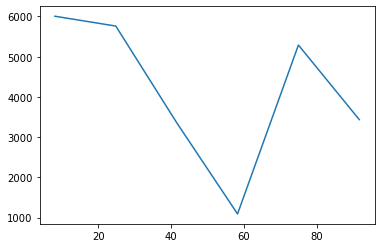

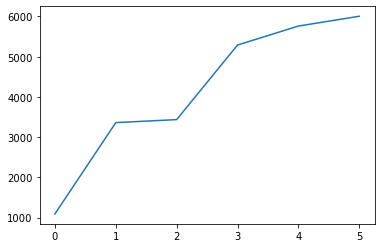

26 55.19509208985419 54.751588062032056 55.63859611767633
39 49.87304375598855 49.42953972816641 50.316547783810684
57 99.54549487206793 99.10199084424579 99.98899889989008


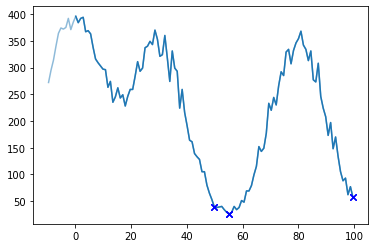

In [14]:
_big_bins = np.linspace(bin_edges[:-1][mask][0], bin_edges[1:][mask][-1], 7)

_big_hist, _ = np.histogram(fval, bins=_big_bins)
_big_bin_cnt = (_big_bins[1:]+_big_bins[:-1])/2

_srt_ndx = np.argsort(_big_hist)

plt.plot(_big_bin_cnt,_big_hist)
plt.show()

plt.plot(_big_hist[_srt_ndx])
plt.show()


_choices = []
_choose_bins=3
for i in range(_choose_bins):
    _binmask = mask*(bin_centers>_big_bins[_srt_ndx[i]])*(bin_centers<_big_bins[_srt_ndx[i]+1])*(hist!=0)
    _smallest_bin = np.argmin(hist[_binmask])
    _choices.append(np.arange(len(hist))[_binmask][_smallest_bin])
    print(hist[_choices[-1]], bin_centers[_choices[-1]], bin_edges[_choices[-1]], bin_edges[_choices[-1]+1])

for i in range(N-len(_choices)):
    _choices.append(_choices[i])

chosen_bins=_choices

plt.plot(bin_centers, hist, color="C0", alpha=0.5)
plt.plot(bin_centers[mask], hist[mask], color="C0")
plt.plot(bin_centers[_choices], hist[_choices], "bx")
plt.show()

[-5.23652365 43.82838284 -7.07370737 ... 11.24312431 14.47744774
 -6.94169417] [40.1430143   6.95269527 32.49724972 ...  0.0880088  26.57865787
 19.40594059]
(14400,) (14400,)


/home/paajasan/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3441: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/paajasan/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3441: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/paajasan/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3441: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/paajasan/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3441: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/paajasan/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3441: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/paajasan/anaconda3/lib/python3.7/site-p

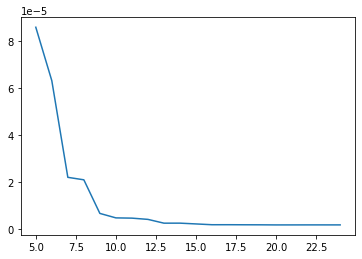

[-48.72164836   0.58154297   2.08415624   3.87983286   8.34056017
  19.51957144  31.46271386  40.03564525  51.79709306] [ 1.07206884e+08 -1.46715800e-02  2.70104257e-03 -1.31163194e-03
  2.20773043e-04 -1.20784686e-03  1.41552154e-03 -4.28148556e-03
  8.55072598e-03]
[ 2.08415624  8.34056017 31.46271386 51.79709306] [0.00270104 0.00022077 0.00141552 0.00855073]
20


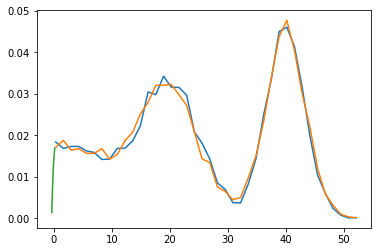

In [7]:
from sklearn.model_selection import train_test_split
_f_train, _f_test = train_test_split(fval, test_size=0.5)
print(_f_test, _f_train)
print(_f_test.shape, _f_train.shape)

_ttbins = np.linspace(bin_edges[:-1][mask][0],bin_edges[1:][mask][-1], 41)
_bincents = (_ttbins[:-1]+_ttbins[1:])/2

_train_hist, _ = np.histogram(_f_train, bins=_ttbins, density=True)
_test_hist,  _ = np.histogram(_f_test,  bins=_ttbins, density=True)

_degs = np.arange(5,25)
_pols = []
_chi2 = []

_x = np.linspace(bin_edges[:-1][mask][0],bin_edges[1:][mask][0],10000)

for d in _degs:
    _pol = np.poly1d(np.polyfit(_bincents, _train_hist, d))
    _pols.append(_pol)
    _dist = np.sum((_test_hist-_pol(_bincents))**2)/len(_bincents)
    _chi2.append(_dist)
    #plt.plot(_x, _pol(_x))

plt.plot(_degs, _chi2)
plt.show()


_pol_arg = np.argmin(_chi2)
dpol = _pols[_pol_arg].deriv()
ddpol = dpol.deriv()

# Find real unique roots
extr = dpol.roots
extr = np.unique(np.real(extr[np.isreal(extr)]))
print(extr, ddpol(extr))

# filter values outside our range
extr = extr[(_ttbins[0]<extr)*(extr<_ttbins[-1])]
# filter maxima and plateaus
extr = extr[ddpol(extr)>0]
print(extr, ddpol(extr))




print(_degs[_pol_arg])
    
plt.plot(_bincents, _train_hist)
plt.plot(_bincents, _test_hist)
plt.plot(_x, _pols[_pol_arg](_x))
plt.show()

[-6.62645806  1.91063779  3.16447192  9.17811194 19.76482196 30.44926072
 40.36085416 48.69597144 51.3574087 ] [-155.69687702    2.81758662   -2.18101879    6.46080573  -13.31033361
   19.82684176  -31.33385626   43.58315087  -90.03793222]
[ 1.91063779  9.17811194 30.44926072 48.69597144] [ 2.81758662  6.46080573 19.82684176 43.58315087]
16


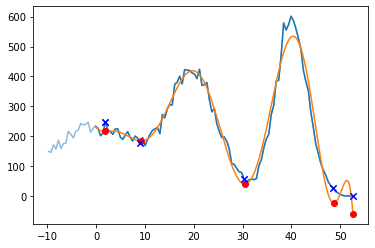

In [8]:
p = np.polyfit(bin_centers[mask], hist[mask], 10)
pol = np.poly1d(p)
dpol = pol.deriv()
ddpol = dpol.deriv()

_minbin = bin_centers[mask][0]
_maxbin = bin_centers[mask][-1]

# Find real unique roots
extr = dpol.roots
extr = np.unique(np.real(extr[np.isreal(extr)]))
print(extr, ddpol(extr))

# filter values outside our range
extr = extr[(_minbin<extr)*(extr<_maxbin)]
# filter maxima and plateaus
extr = extr[ddpol(extr)>0]
print(extr, ddpol(extr))

# ends
extr = list(extr)
if(dpol(_minbin)>0):
    extr.append(_minbin)
if(dpol(_maxbin)<0):
    extr.append(_maxbin)
    
extr = np.array(extr)


_choices = []
for e in extr:
    _choices.append(np.argmin(np.abs(bin_centers-e+np.where(hist==0, np.inf, 0))))

for i in range(N-len(_choices)):
    _choices.append(_choices[i])

print(len(_choices))
_choices=np.array(_choices)

_x = np.linspace(_minbin,_maxbin,10000)

plt.plot(bin_centers, hist, color="C0", alpha=0.5)
plt.plot(bin_centers[mask], hist[mask], color="C0")
plt.plot(_x, pol(_x), color="C1")
plt.plot(extr, pol(extr), "ro")
plt.plot(bin_centers[_choices], hist[_choices], "bx")
plt.show()